In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [47]:
df = pd.read_csv("Crop_Yield_Prediction.csv")
df.columns = df.columns.str.strip()

In [49]:
df['Crop'] = df['Crop'].astype('category').cat.codes

In [51]:
X = df.drop('Yield', axis=1)
y = df['Yield']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6770620.087325654


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [62]:
df['Crop'] = df['Crop'].astype('category').cat.codes

In [64]:
X = df.drop('Crop', axis=1)
y = df['Crop']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

In [73]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [75]:
X = df.drop(['Crop', 'Yield'], axis=1)

In [77]:
sse = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    sse.append(km.inertia_)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

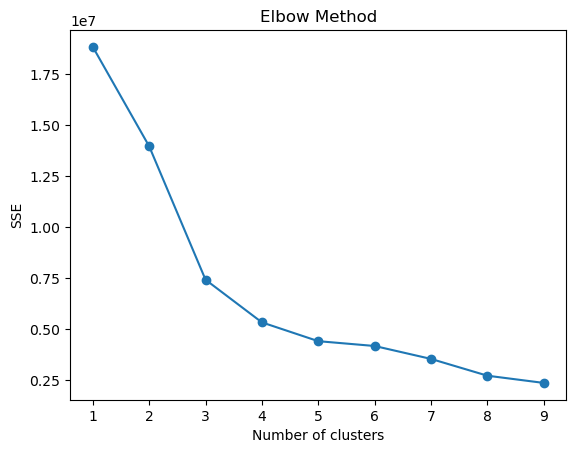

In [79]:
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [81]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


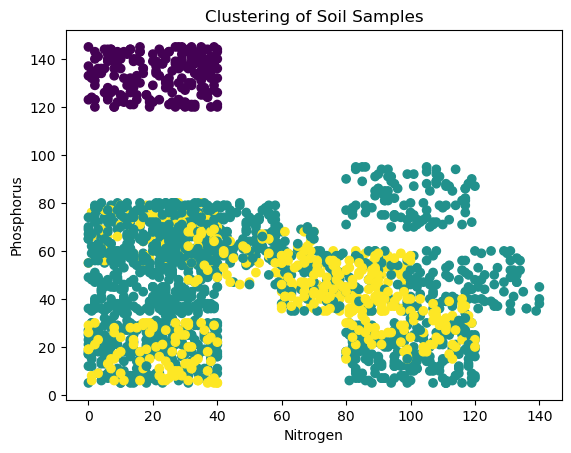

In [83]:
plt.scatter(df['Nitrogen'], df['Phosphorus'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Nitrogen')
plt.ylabel('Phosphorus')
plt.title('Clustering of Soil Samples')
plt.show()

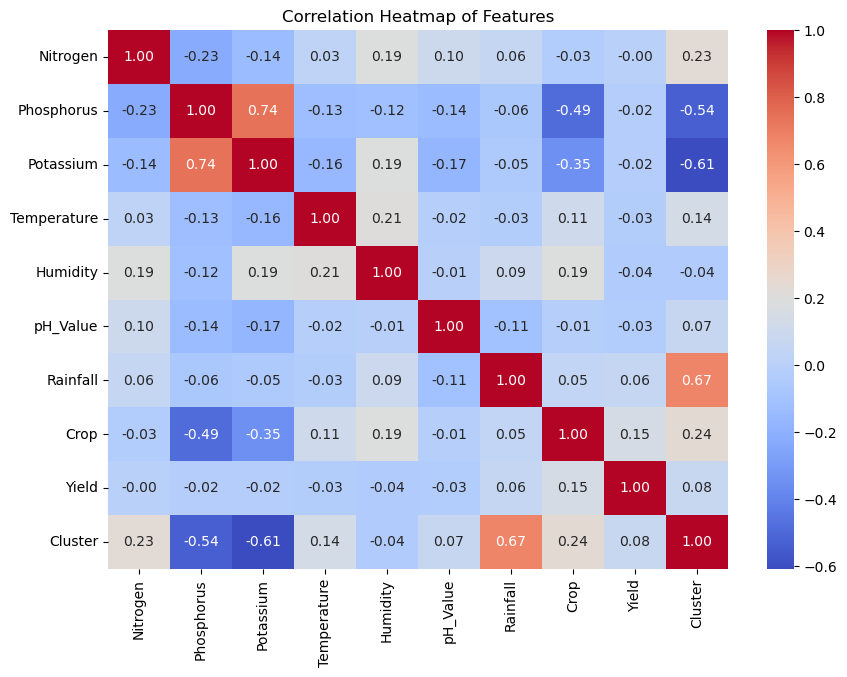

In [91]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()


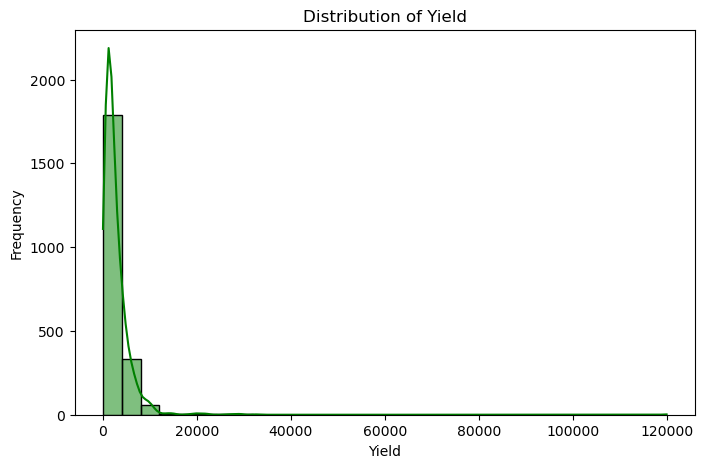

In [87]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Yield'], bins=30, kde=True, color='green')
plt.title("Distribution of Yield")
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.show()


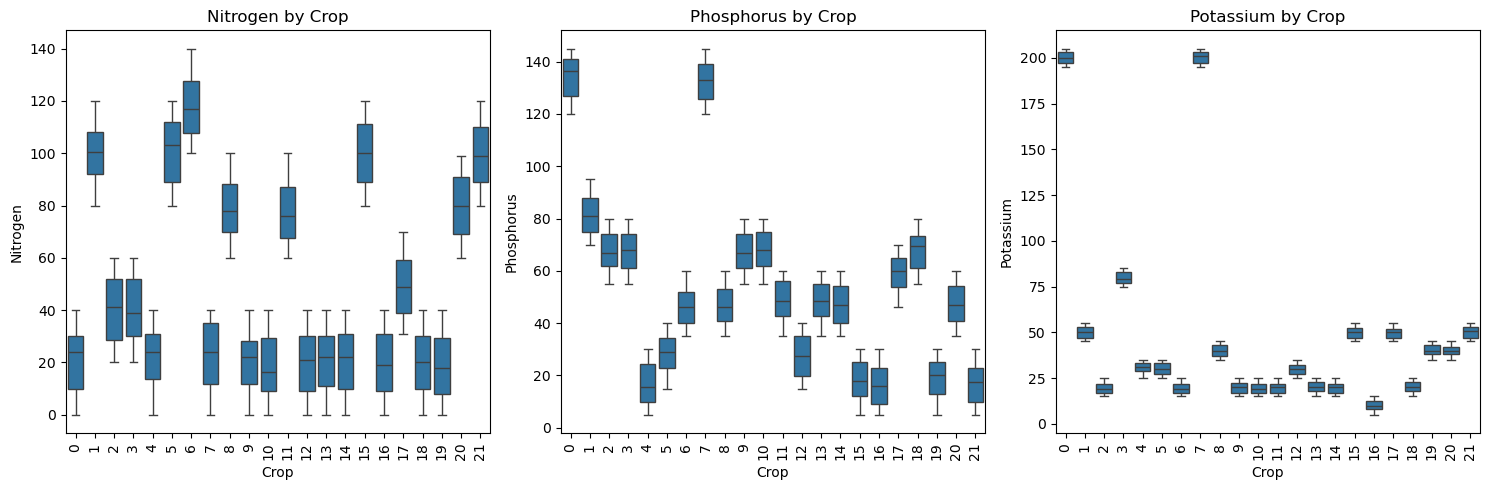

In [93]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Nitrogen', 'Phosphorus', 'Potassium']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x='Crop', y=feature)
    plt.xticks(rotation=90)
    plt.title(f'{feature} by Crop')

plt.tight_layout()
plt.show()


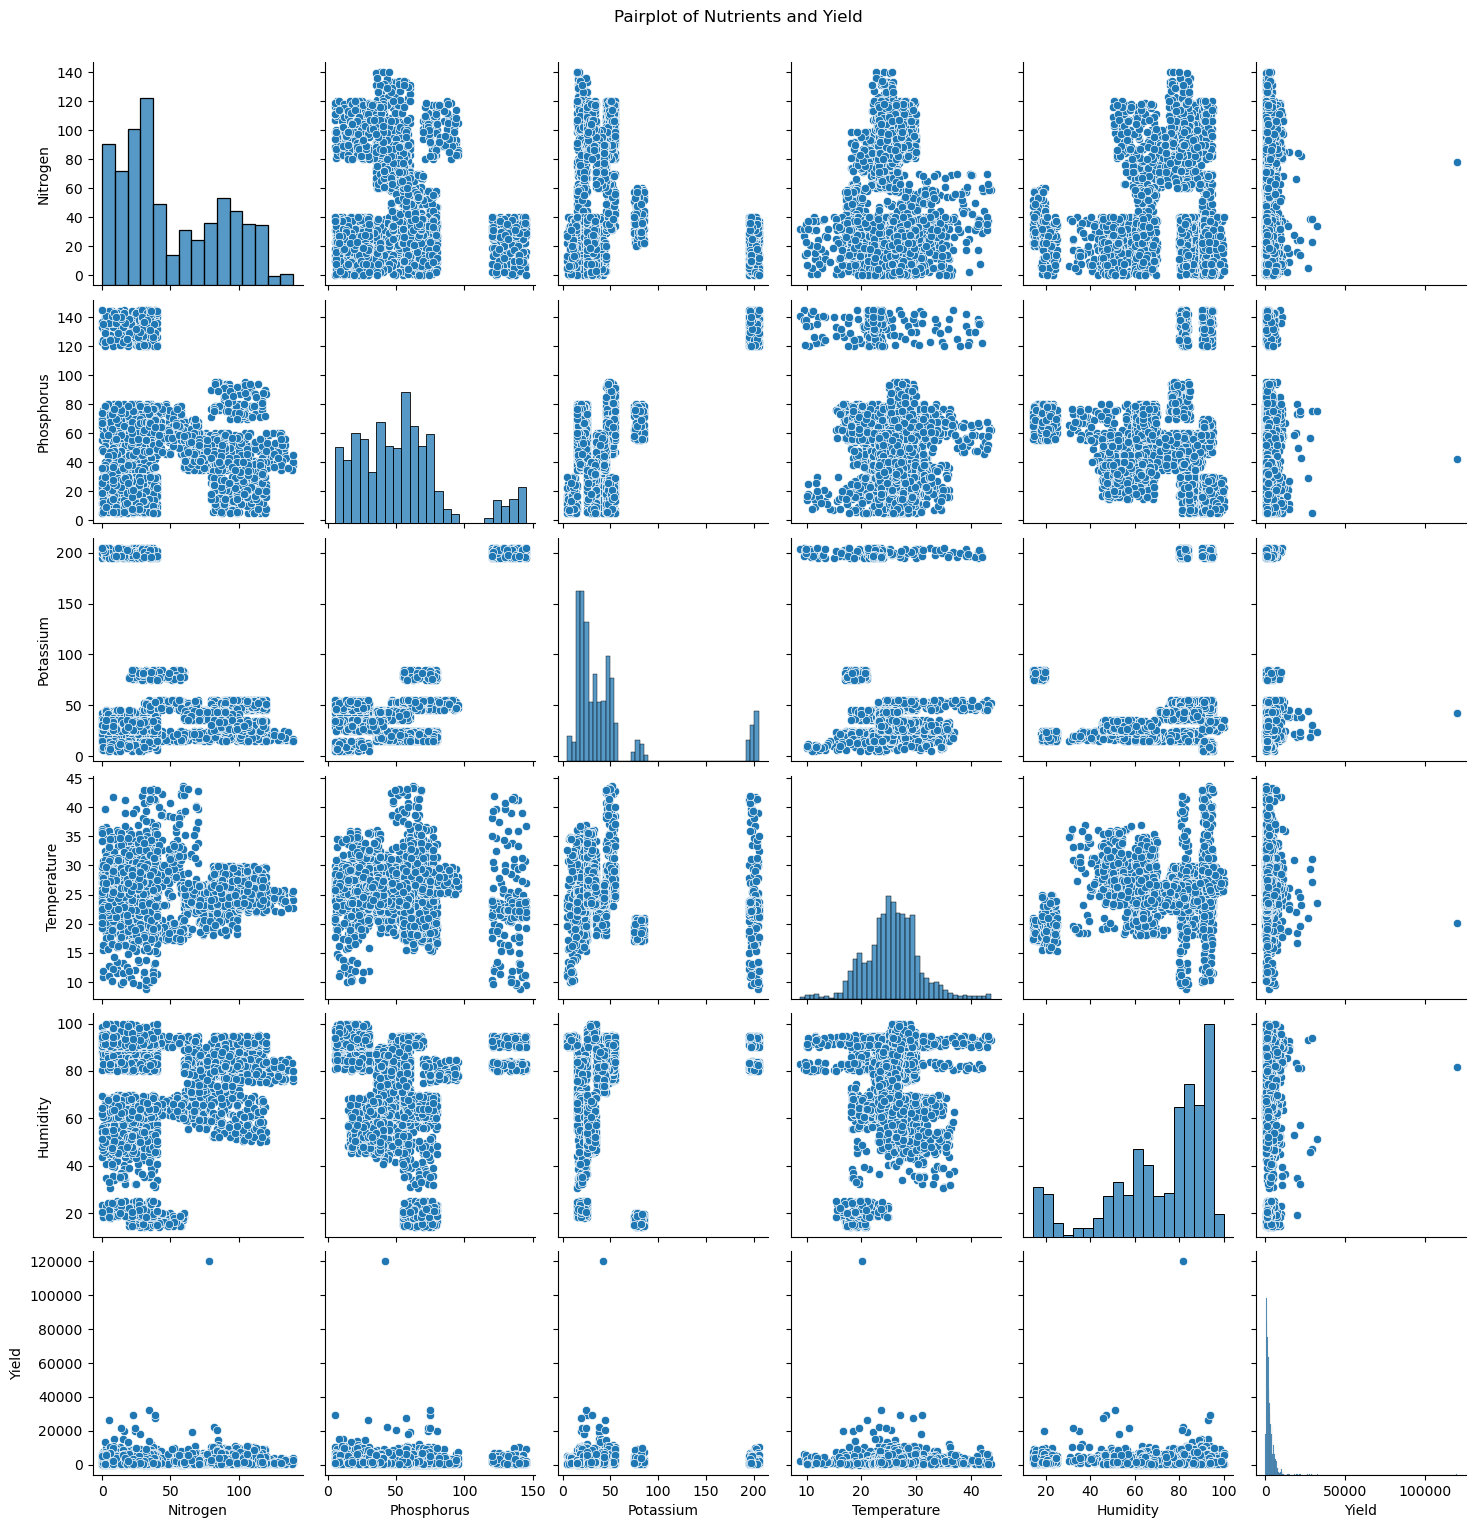

In [95]:
sns.pairplot(df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'Yield']])
plt.suptitle("Pairplot of Nutrients and Yield", y=1.02)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_14084\2294503466.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Crop', y='Yield', estimator='mean', ci=None)


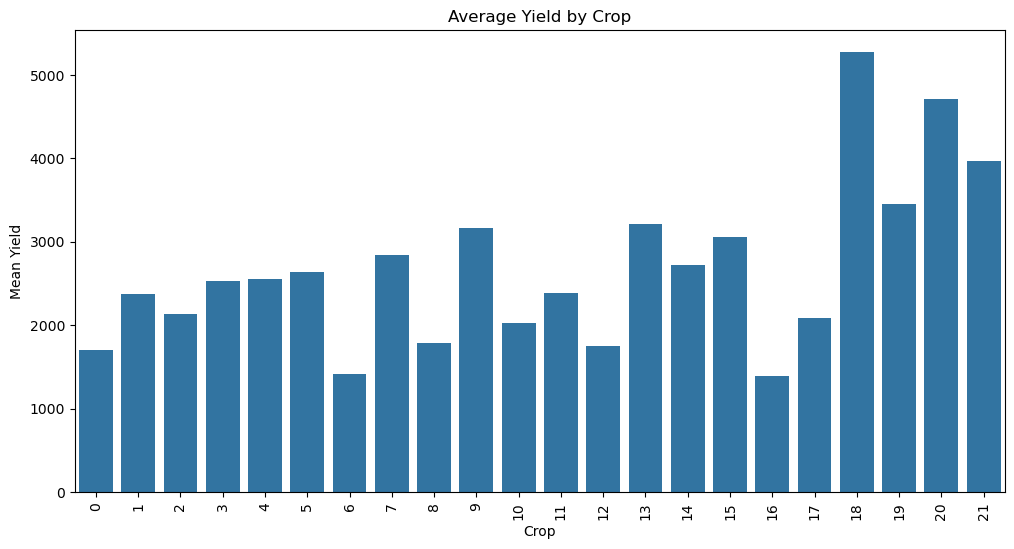

In [97]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Crop', y='Yield', estimator='mean', ci=None)
plt.xticks(rotation=90)
plt.title("Average Yield by Crop")
plt.ylabel("Mean Yield")
plt.show()
